# Q2 superstore_dataset2011-2015

In [2]:
import warnings  
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from ydata_profiling import ProfileReport

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Split the data into test set and train set
from sklearn.model_selection import train_test_split
# Precision of the model
from sklearn.metrics import r2_score

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


pd.options.display.float_format = '{:.4f}'.format
sns.set(color_codes=True)
sns.set_style('darkgrid')
%matplotlib inline 

In [3]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 19212: invalid continuation byte

# https://stackoverflow.com/questions/4299802/python-convert-string-from-utf-8-to-latin-1

df = pd.read_csv('Q2superstore_dataset2011-2015.csv', encoding='latin-1')

In [4]:
# pip install ydata-profiling

In [5]:
# !pip install missingno

In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Wrangling

In [5]:
df.head()

Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632   1/1/2011  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

         Product ID         Category Sub-Category  \
0  OFF-TEN-10000025  Office Supplies      Storage   
1   OFF-SU-10000618  Office Supplies     Supplies   
2  OFF-TEN-10001585  Office Supplies      Storage   
3   OFF-PA-10001492  Office Supplies        Paper   
4   FUR-FU-10003447        Furniture  Furnishings   

                  Product Name  Sales Quantity Discount Profit  Shipping Cost  \
0          Tenex Lockers, Blue 408.30        2     0.00 106.14          35.46   
1     Acme Trimmer, High Speed 120.37        3     0.10  36.04           9.72   
2      Tenex Box, Single Width  66.12        4     0.00  29.64           8.17   
3  Enermax Note Cards, Premium  44.87        3     0.50 -26.05           4.82   
4   Eldon Light Bulb, Duo Pack 113.67        5     0.10  37.77           4.70   

   Order Priority  
0          Medium  
1          Medium  
2            High  
3            High  
4          Medium  

[5 rows x 24 columns]

In [6]:
df.tail()

Row ID        Order ID  Order Date Ship Date       Ship Mode  \
51285   32593  CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286   47594    MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287    8857  MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288    6852  MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   36388  CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

      Customer ID     Customer Name    Segment       City             State  \
51285    EB-13975        Erica Bern  Corporate  Fairfield        California   
51286     LP-7095         Liz Preis   Consumer     Agadir  Souss-Massa-Draâ   
51287    CM-12190  Charlotte Melton   Consumer    Managua           Managua   
51288    TD-20995     Tamara Dahlen   Consumer     Juárez         Chihuahua   
51289    JM-15580     Jill Matthias   Consumer   Loveland          Colorado   

       ...        Product ID         Category Sub-Category  \
51285  ...   OFF-BI-10002103  Office Supplies      Binders   
51286  ...  OFF-WIL-10001069  Office Supplies      Binders   
51287  ...   OFF-LA-10004182  Office Supplies       Labels   
51288  ...   OFF-LA-10000413  Office Supplies       Labels   
51289  ...   OFF-FA-10003472  Office Supplies    Fasteners   

                                          Product Name Sales Quantity  \
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl 13.90        2   
51286          Wilson Jones Hole Reinforcements, Clear  3.99        1   
51287           Hon Color Coded Labels, 5000 Label Set 26.40        3   
51288           Hon Legal Exhibit Labels, Alphabetical  7.12        1   
51289                              Bagged Rubber Bands  3.02        3   

      Discount Profit  Shipping Cost  Order Priority  
51285     0.20   4.52           0.89          Medium  
51286     0.00   0.42           0.49          Medium  
51287     0.00  12.36           0.35          Medium  
51288     0.00   0.56           0.20          Medium  
51289     0.20  -0.60           0.17          Medium  

[5 rows x 24 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

There are missing values in "Postal Code" column. 

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


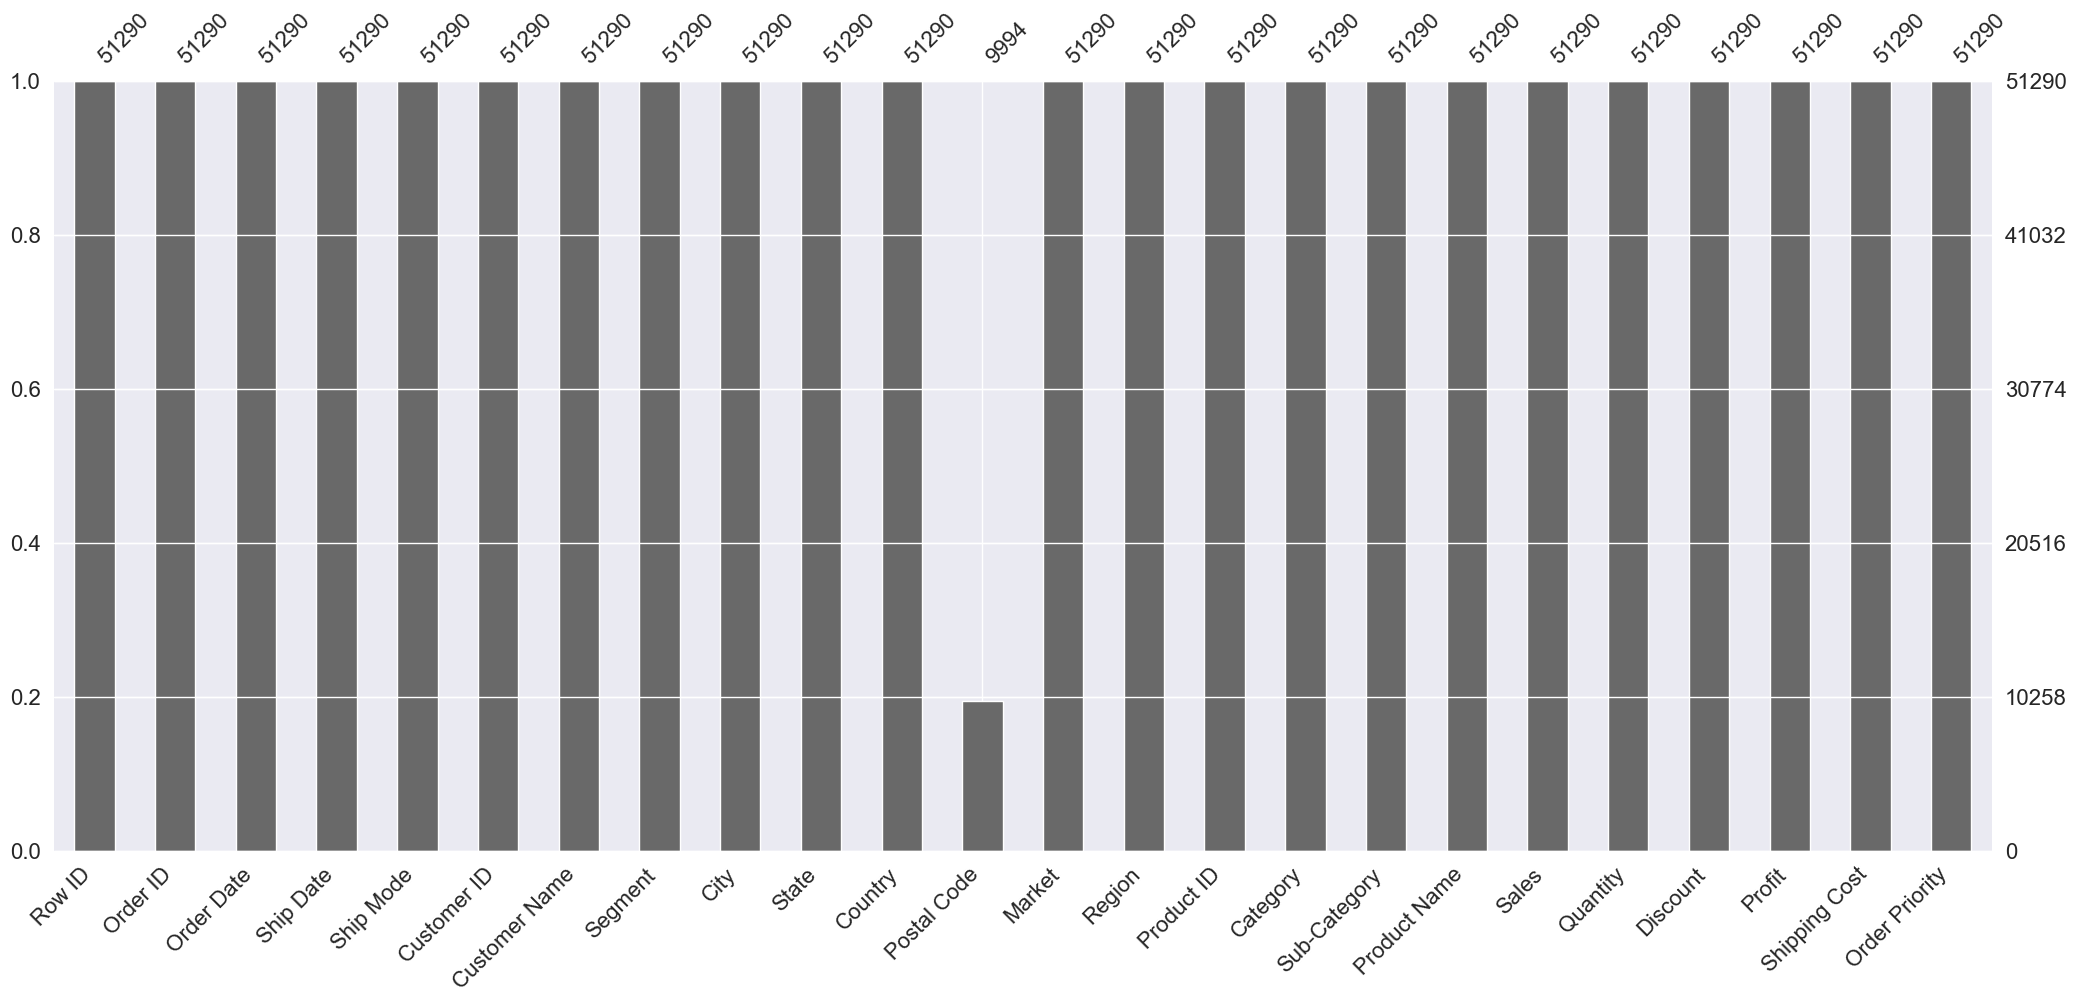

In [8]:
# Checking for missing values

ax = msno.bar(df)

print('There are missing values in "Postal Code" column.','\n')
print(df.isnull().sum())

In [9]:
# Approximately 80% of the data in the Postal column is missing. 
# It is not relevant for the analysis

miss_val_pc = (df['Postal Code'].isnull().sum() / len(df['Postal Code'])) * 100
print('"Postal Code" has {:.2f}% missing values'.format(miss_val_pc))

"Postal Code" has 80.51% missing values


In [10]:
df.describe()

Row ID  Postal Code    Sales  Quantity  Discount   Profit  \
count 51290.00      9994.00 51290.00  51290.00  51290.00 51290.00   
mean  25645.50     55190.38   246.49      3.48      0.14    28.61   
std   14806.29     32063.69   487.57      2.28      0.21   174.34   
min       1.00      1040.00     0.44      1.00      0.00 -6599.98   
25%   12823.25     23223.00    30.76      2.00      0.00     0.00   
50%   25645.50     56430.50    85.05      3.00      0.00     9.24   
75%   38467.75     90008.00   251.05      5.00      0.20    36.81   
max   51290.00     99301.00 22638.48     14.00      0.85  8399.98   

       Shipping Cost  
count       51290.00  
mean           26.38  
std            57.30  
min             0.00  
25%             2.61  
50%             7.79  
75%            24.45  
max           933.57

In [11]:
print('Total number of observations:', df.shape[0])
before_drop = df.shape[1]
print('Total number of attributes before dropping:', before_drop)

Total number of observations: 51290
Total number of attributes before dropping: 24


In [12]:
print('Columns before dropping:\n\n',df.columns)

Columns before dropping:

 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


#### Dropping irrelevant columns 

In [13]:
# Removing the unnecassary features from the dataset which are not relavent

df.drop(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID',
       'Customer Name', 'Postal Code', 'Product ID'],axis=1,inplace=True)

In [14]:
print('Columns after dropping:\n\n', df.columns)

Columns after dropping:

 Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [15]:
print('Total number of attributes BEFORE dropping:', before_drop)
print('Total number of attributes AFTER dropping:', df.shape[1])

Total number of attributes BEFORE dropping: 24
Total number of attributes AFTER dropping: 16


In [16]:
# if the number of unique values is less than 20 then the variable is likely to be categorical otherwise continuous.
df.nunique()

Ship Mode             4
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

# Exploratory Data Analysis

### Overview of the total values for some Categorical Values

In [17]:
cat_var = ['Ship Mode','Segment','Market','Region',
           'Category','Sub-Category','Order Priority']

for i in cat_var:
    print(i) 
    print(df[i].value_counts())

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64
Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64
Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64
Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64
Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accesso

### Overview of the % for some Categorical Values

In [18]:
cat_var = ['Ship Mode','Segment','Market','Region',
           'Category','Sub-Category','Order Priority']

for i in cat_var:
    print(i)
    print(df[i].value_counts(normalize=True) * 100)

# https://pandas.pydata.org/pandas-docs/version/0.25.1/reference/api/pandas.Series.value_counts.html#:~:text=With%20normalize%20set%20to%20True,by%20the%20sum%20of%20values.&text=Bins%20can%20be%20useful%20for,number%20of%20half%2Dopen%20bins.

Ship Mode
Standard Class   60.00
Second Class     20.10
First Class      14.63
Same Day          5.27
Name: Ship Mode, dtype: float64
Segment
Consumer      51.70
Corporate     30.08
Home Office   18.22
Name: Segment, dtype: float64
Market
APAC     21.45
LATAM    20.07
EU       19.50
US       19.49
EMEA      9.81
Africa    8.94
Canada    0.75
Name: Market, dtype: float64
Region
Central          21.67
South            12.96
EMEA              9.81
North             9.33
Africa            8.94
Oceania           6.80
West              6.24
Southeast Asia    6.10
East              5.55
North Asia        4.56
Central Asia      3.99
Caribbean         3.29
Canada            0.75
Name: Region, dtype: float64
Category
Office Supplies   60.97
Technology        19.77
Furniture         19.26
Name: Category, dtype: float64
Sub-Category
Binders       11.99
Storage        9.86
Art            9.52
Paper          6.90
Chairs         6.70
Phones         6.55
Furnishings    6.18
Accessories    6.00
Labels 

### Visualize distribution of the Categorical Variables in the data using bar plots

In [20]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar Charts of:'+ str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber]) 

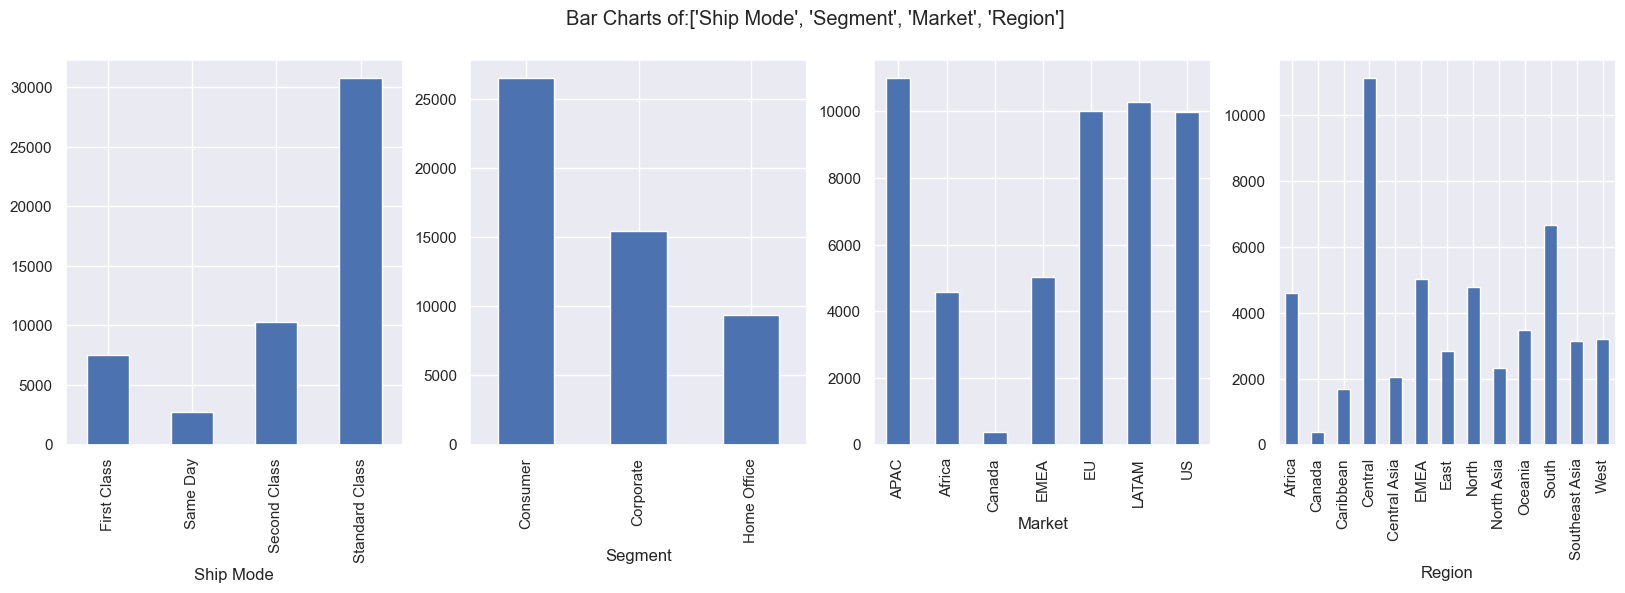

In [21]:
# Calling the function

PlotBarCharts(inpData=df, colsToPlot=['Ship Mode','Segment','Market','Region']);

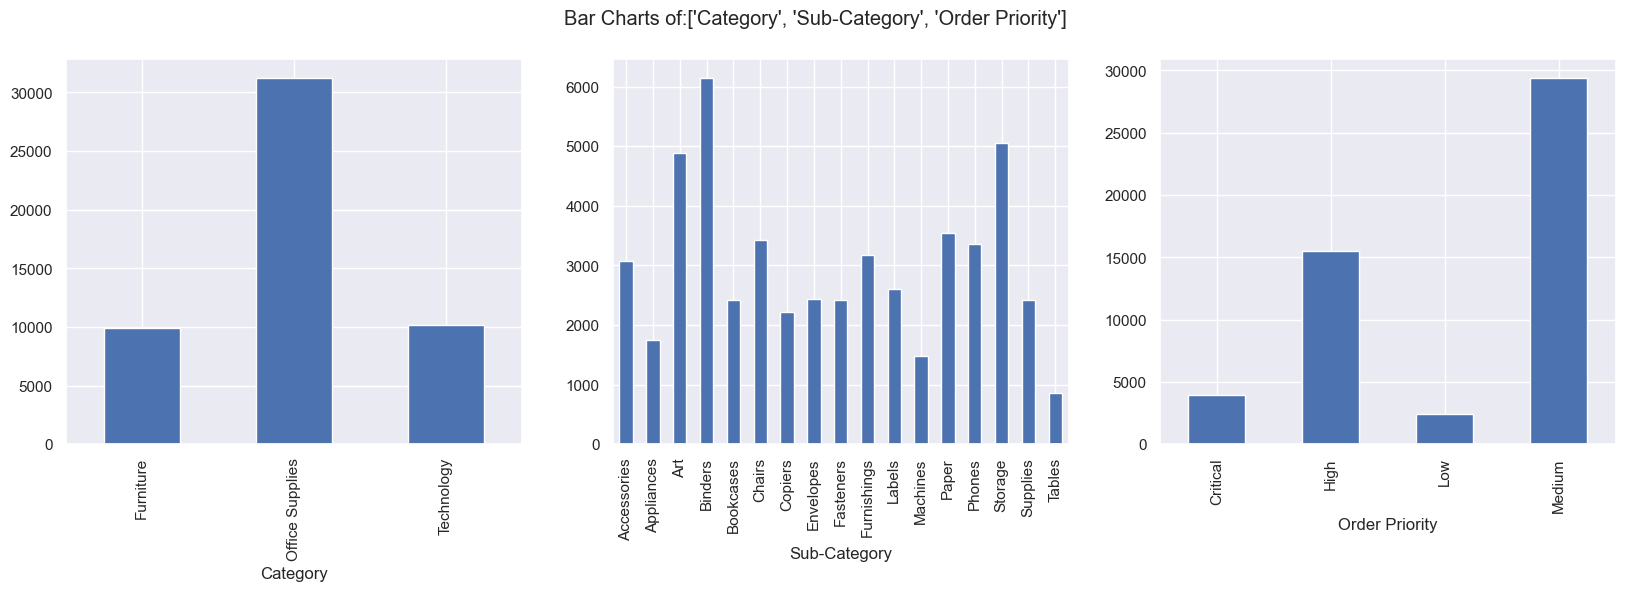

In [22]:
PlotBarCharts(inpData=df, colsToPlot=['Category','Sub-Category','Order Priority']);

## Unique Variables

- Country
- State
- City
-Product Name

In [23]:
# Unique occurrences of Countries

unique_countries = df['Country'].unique()
count_unique_countries = len(unique_countries)

print(f'Unique occurrences of countries: {count_unique_countries}','\n')
print(unique_countries)

Unique occurrences of countries: 147 

['Algeria' 'Australia' 'Hungary' 'Sweden' 'Bangladesh' 'United States'
 'Angola' 'China' 'Panama' 'Iran' 'France' 'Italy' 'Germany' 'Canada'
 'United Kingdom' 'Ukraine' 'Japan' 'Indonesia' 'Nigeria' 'South Korea'
 'Peru' 'Philippines' 'Colombia' 'Ireland' 'Nicaragua' 'Mexico' 'Brazil'
 'Turkey' 'Spain' 'Poland' 'India' 'Somalia' 'El Salvador' 'Sudan'
 'Slovakia' 'Egypt' 'Saudi Arabia' 'Democratic Republic of the Congo'
 'Norway' 'New Zealand' 'Kenya' 'Cuba' 'Venezuela' 'Singapore' 'Honduras'
 'Tanzania' 'Dominican Republic' 'Morocco' 'Albania' 'Belgium'
 'Afghanistan' 'Bolivia' 'Vietnam' 'Guatemala' 'Guinea-Bissau' 'Thailand'
 'Iraq' 'Myanmar (Burma)' 'Ecuador' 'Netherlands' 'Ghana' "Cote d'Ivoire"
 'Austria' 'Argentina' 'Madagascar' 'Russia' 'South Africa'
 'Bosnia and Herzegovina' 'Malaysia' 'Romania' 'Israel' 'Burundi'
 'Cameroon' 'Paraguay' 'Senegal' 'Georgia' 'Kazakhstan'
 'United Arab Emirates' 'Pakistan' 'Liberia' 'Czech Republic' 'Jamaica'

In [24]:
# Unique occurrences of States

unique_states = df['State'].unique()
count_unique_states = len(unique_states)

# Unique occurrences of Cities

unique_cities = df['City'].unique()
count_unique_cities = len(unique_cities)

# Unique occurrences of Products

unique_products = df['Product Name'].unique()
count_unique_products = len(unique_products)

print(f'Unique occurrences of states: {count_unique_states}')
print(f'Unique occurrences of cities: {count_unique_cities}')
print(f'Unique occurrences of products: {count_unique_products}')

Unique occurrences of states: 1094
Unique occurrences of cities: 3636
Unique occurrences of products: 3788


### Top 20 Sales for Countries, States, Cities and Products

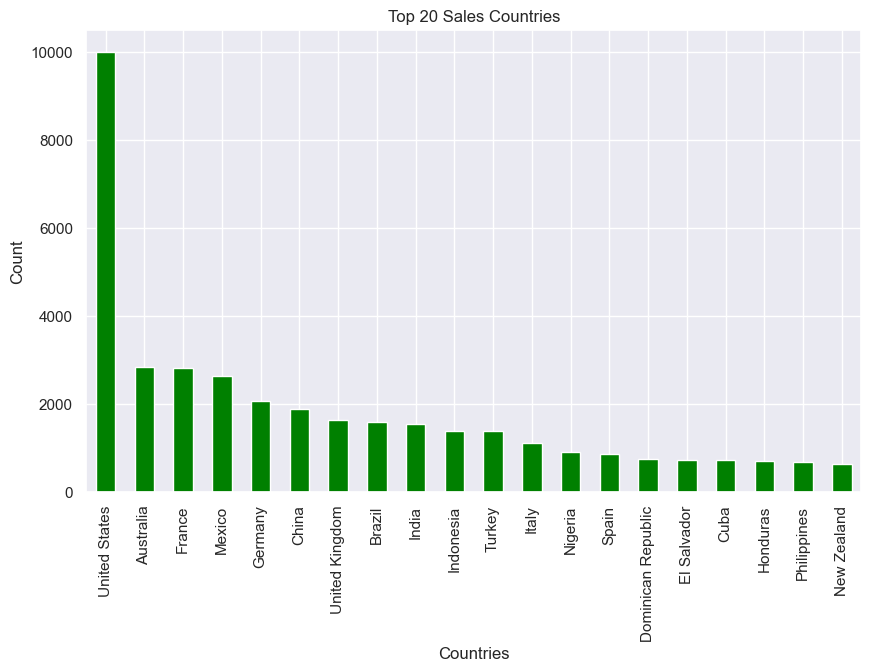

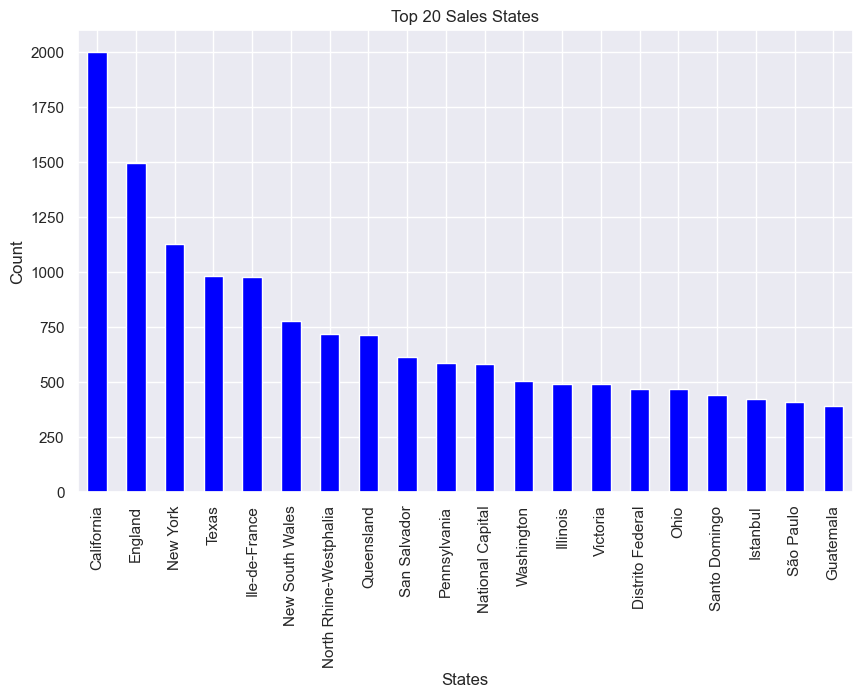

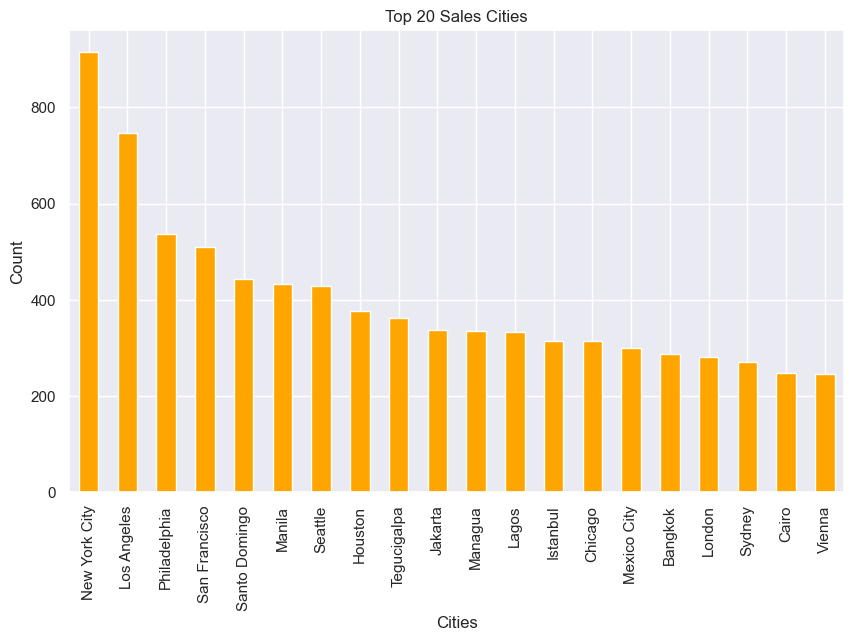

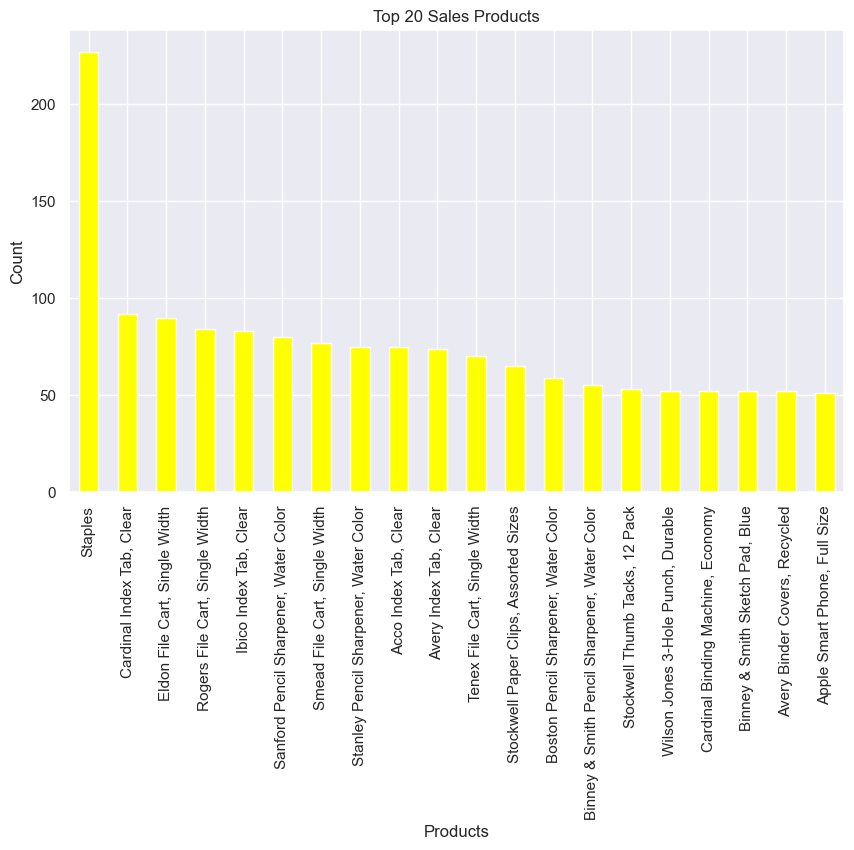

In [25]:
# Top 20 Sales Countries

plt.figure(figsize=(10, 6))

top_20_countries = df['Country'].value_counts().head(20)
top_20_countries.plot(kind='bar', color='green')

plt.title('Top 20 Sales Countries')
plt.ylabel('Count')
plt.xlabel('Countries')

plt.show()

# Top 20 Sales States

plt.figure(figsize=(10, 6))

top_20_states = df['State'].value_counts().head(20)
top_20_states.plot(kind='bar', color='blue')

plt.title('Top 20 Sales States')
plt.ylabel('Count')
plt.xlabel('States')

plt.show()

# Top 20 Sales Cities

plt.figure(figsize=(10, 6))

top_20_cities = df['City'].value_counts().head(20)
top_20_cities.plot(kind='bar', color='Orange')

plt.title('Top 20 Sales Cities')
plt.ylabel('Count')
plt.xlabel('Cities')

plt.show()

# Top 20 Sales Products

plt.figure(figsize=(10, 6))

top_20_products = df['Product Name'].value_counts().head(20)
top_20_products.plot(kind='bar', color='Yellow')

plt.title('Top 20 Sales Products')
plt.ylabel('Count')
plt.xlabel('Products')

plt.show()

### Top 20 Profitable Countries

In [26]:
grouped_profit = df.groupby('Country')['Profit'].sum().reset_index()

top20_profit = grouped_profit.sort_values('Profit', ascending=False)

# Top 20 Profitable Countries
top20_profit.head(20)

Country    Profit
139   United States 286397.02
26            China 150683.08
57            India 129071.84
138  United Kingdom 111900.15
44           France 109029.00
47          Germany 107322.82
6         Australia 103907.43
81           Mexico 102818.10
119           Spain  54390.12
38      El Salvador  42023.24
30             Cuba  38889.22
92        Nicaragua  33401.44
17           Brazil  30090.50
50        Guatemala  27944.69
59             Iran  26856.24
7           Austria  24341.70
65            Japan  24328.47
85          Morocco  22761.42
107          Russia  22536.45
116    South Africa  21936.63

### Selecting  predictor variables for Machine Learning

In [191]:
selected_columns = ['Segment','Sales','Quantity','Discount','Profit','Shipping Cost']
variables_for_ml = df[selected_columns]
variables_for_ml.head()

Segment    Sales  Quantity  Discount   Profit  Shipping Cost
0     Consumer 408.3000         2    0.0000 106.1400        35.4600
1     Consumer 120.3660         3    0.1000  36.0360         9.7200
2     Consumer  66.1200         4    0.0000  29.6400         8.1700
3  Home Office  44.8650         3    0.5000 -26.0550         4.8200
4     Consumer 113.6700         5    0.1000  37.7700         4.7000

In [192]:
# Separate Predictor Variables and Target Variable 

X = variables_for_ml.drop(['Profit'], axis=1).values
y = variables_for_ml['Profit'].values

In [193]:
X

array([['Consumer', 408.3, 2, 0.0, 35.46],
       ['Consumer', 120.366, 3, 0.1, 9.72],
       ['Consumer', 66.12, 4, 0.0, 8.17],
       ...,
       ['Consumer', 26.4, 3, 0.0, 0.35],
       ['Consumer', 7.12, 1, 0.0, 0.2],
       ['Consumer', 3.024, 3, 0.2, 0.17]], dtype=object)

In [194]:
y

array([106.14,  36.04,  29.64, ...,  12.36,   0.56,  -0.6 ])

In [195]:
X.shape, y.shape

((51290, 5), (51290,))

### Encoding categorical data

In [196]:
# We enconde Segment variable

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 2 0.0 35.46]
 [1.0 0.0 0.0 ... 3 0.1 9.72]
 [1.0 0.0 0.0 ... 4 0.0 8.17]
 ...
 [1.0 0.0 0.0 ... 3 0.0 0.35]
 [1.0 0.0 0.0 ... 1 0.0 0.2]
 [1.0 0.0 0.0 ... 3 0.2 0.17]]


In [197]:
# Cheking the order of the dummy columns:

encoded_dataset = pd.get_dummies(variables_for_ml)
dummy_columns = encoded_dataset.columns
print(dummy_columns)

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office'],
      dtype='object')


#### Splitting the dataset into the Training set and Test set

In [198]:
# Splitting the data - test set 20%, train set 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [199]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (51290, 7) (51290,)
Number of rows and columns after splitting dataset:  (41032, 7) (10258, 7) (41032,) (10258,)


### Feature Scaling

In [ ]:
# There are no changes in predicting better test scores while applying feature scaling
# Applying feature scaling has a negative impact on the expected profits


# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# print(X_train,'\n')
# # print(X_test)

### Multiple Linear Regression Model

In [278]:
# Training the Multiple Linear Regression model on the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [279]:
# Predicting the Test set results
# Remember that we need to check our training results on the Test set but we can't plot a graph

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # we display values with only 2 decimals after the comma

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

# right = predictions Vs Left = Reality

[[  32.18    1.11]
 [  87.27   57.12]
 [ -11.79 -289.84]
 ...
 [ -62.97  -28.87]
 [ -75.76 -285.23]
 [  46.59    6.46]]


#### Evaluating the Model Performance

In [280]:
# We calculate the precision of the model

precision_mr = regressor.score(X_train, y_train)
print('Performance Multiple Regression Model: {:.4f}%'.format(precision_mr))

Performance Multiple Regression Model: 0.3533%


In [285]:
# We build the equation
# We build the linear regression function

print('Coefficients:')
print('m =',regressor.coef_,'\n') # Slope

print('The interception is:')
print('b =',regressor.intercept_)

# y = mx + b

Coefficients:
m = [  -0.75   -0.53    1.27    0.21   -4.56 -219.62   -0.25] 

The interception is:
b = 32.44147537052134


In [287]:
print('The multi linear regression function is: y = ', regressor.coef_, 'x + ', regressor.intercept_)

The multi linear regression function is: y =  [  -0.75   -0.53    1.27    0.21   -4.56 -219.62   -0.25] x +  32.44147537052134


In [290]:
print('y = (-0.75 * X1 - 0.53 * X2 + 1.27 * X3 + 0.21 * X4 - 4.56 * X5 - 219.62 * X6 - 0.25 * X7) + 32.44147537052134')

y = (-0.75 * X1 - 0.53 * X2 + 1.27 * X3 + 0.21 * X4 - 4.56 * X5 - 219.62 * X6 - 0.25 * X7) + 32.44147537052134


In [253]:
# How much profit do we expect from:

# Segment	Sales	Quantity	Discount		Shipping Cost

# Consumer  250      3            0.05             25
# Corporate 300      5            0.10             30
# Home O.   260      3            0.05             25

pred_consumer = regressor.predict([[1, 0, 0, 250, 3, 0.05, 25]])
pred_corp     = regressor.predict([[0, 1, 0, 300, 5, 0.10, 30]]) 
pred_ho       = regressor.predict([[0, 0, 1, 260, 3, 0.05, 25]])                         
    
print("The expected profit from Consumer:", pred_consumer)
print("The expected profit from Corporate:", pred_corp)
print("The expected profit from Home Office:", pred_ho)

The expected profit from Consumer: [52.22]
The expected profit from Corporate: [41.38]
The expected profit from Home Office: [56.29]


## Decision Tree Regression

In [254]:
# Training the Decision Tree Regression model on the training set

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [255]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # 2 decimals after comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[   1.11    1.11]
 [  83.46   57.12]
 [-115.35 -289.84]
 ...
 [ -32.56  -28.87]
 [-264.65 -285.23]
 [  33.48    6.46]]


#### Evaluating the Model Performance

In [256]:
# r^2
# Precision

precision_dt = r2_score(y_test, y_pred)
print('Performance DT Model: {:.4f}%'.format(precision_dt))

Performance DT Model: 0.5491%


In [258]:
# How much profit do we expect from:

# Segment	Sales	Quantity	Discount		Shipping Cost

# Consumer  250      3            0.05             25
# Corporate 300      5            0.10             30
# Home O.   260      3            0.05             25

pred_consumer = regressor.predict([[1, 0, 0, 250, 3, 0.05, 25]])
pred_corp     = regressor.predict([[0, 1, 0, 300, 5, 0.10, 30]]) 
pred_ho       = regressor.predict([[0, 0, 1, 260, 3, 0.05, 25]])                         
    
print("The expected profit from Consumer:", pred_consumer)
print("The expected profit from Corporate:", pred_corp)
print("The expected profit from Home Office:", pred_ho)

The expected profit from Consumer: [72.32]
The expected profit from Corporate: [49.31]
The expected profit from Home Office: [4.95]


## Random Forest Regression

In [259]:
# Training the Random Forest Regression model on the training set

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [260]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # 2 decimals after comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[   5.2     1.11]
 [  73.66   57.12]
 [ -89.43 -289.84]
 ...
 [ -32.46  -28.87]
 [-219.61 -285.23]
 [  38.15    6.46]]


#### Evaluating the Model Performance

In [261]:
# r^2
# Precision

precision_rf = r2_score(y_test, y_pred)
print('Performance RF Model: {:.4f}%'.format(precision_rf))

Performance RF Model: 0.5766%


In [262]:
# How much profit do we expect from:

# Segment	Sales	Quantity	Discount		Shipping Cost

# Consumer  250      3            0.05             25
# Corporate 300      5            0.10             30
# Home O.   260      3            0.05             25

pred_consumer = regressor.predict([[1, 0, 0, 250, 3, 0.05, 25]])
pred_corp     = regressor.predict([[0, 1, 0, 300, 5, 0.10, 30]]) 
pred_ho       = regressor.predict([[0, 0, 1, 260, 3, 0.05, 25]])                         
    
print("The expected profit from Consumer:", pred_consumer)
print("The expected profit from Corporate:", pred_corp)
print("The expected profit from Home Office:", pred_ho)

The expected profit from Consumer: [51.17]
The expected profit from Corporate: [27.17]
The expected profit from Home Office: [67.21]


## Profit Models Comparison

In [277]:
data = {
    'Profit Models': ['Multiple Regression', 'Decision Tree', 'Random Forest'],
    'Consumer': [52.22, 72.32, 51.17],
    'Corporate': [41.38, 49.31, 27.17],
    'Home Office': [56.29, 4.95, 67.21]}

profit_comparison = pd.DataFrame(data)
profit_comparison.set_index('Profit Models', inplace=True)
profit_comparison

Consumer  Corporate  Home Office
Profit Models                                        
Multiple Regression   52.2200    41.3800      56.2900
Decision Tree         72.3200    49.3100       4.9500
Random Forest         51.1700    27.1700      67.2100

## Collect Models Data

In [273]:
models = ['Multiple Regression', 'Decision Tree','Random Forest']

scores = [0.3533, 0.5491, 0.5766] 

## Regression Models Comparison

In [274]:
models_comparison = pd.DataFrame()

models_comparison['Test Score'] = scores
models_comparison.index = models
models_comparison

Test Score
Multiple Regression      0.3533
Decision Tree            0.5491
Random Forest            0.5766

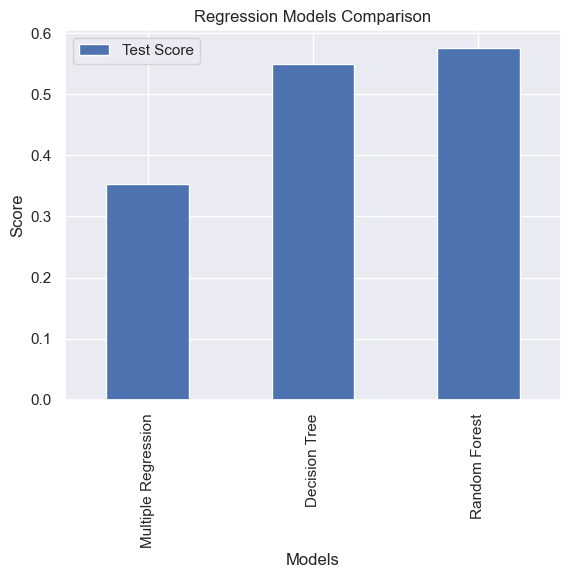

In [275]:
models_comparison.plot(kind='bar')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Regression Models Comparison');